0.25
0.015625
6.103515625e-05
[ 0.        0.0625    0.125     0.1875    0.25      0.3125    0.375
  0.421875  0.484375  0.53125   0.59375   0.640625  0.6875    0.734375
  0.765625  0.8125    0.84375   0.875     0.90625   0.9375    0.953125
  0.96875   0.984375  0.984375  1.        1.        1.        0.984375
  0.984375  0.96875   0.953125  0.9375    0.90625   0.875     0.84375
  0.8125    0.765625  0.734375  0.6875    0.640625  0.59375   0.53125
  0.484375  0.421875  0.375     0.3125    0.25      0.1875    0.125
  0.0625    0.       -0.0625   -0.125    -0.1875   -0.25     -0.3125
 -0.375    -0.421875 -0.484375 -0.53125  -0.59375  -0.640625 -0.6875
 -0.734375 -0.765625 -0.8125   -0.84375  -0.875    -0.90625  -0.9375
 -0.953125 -0.96875  -0.984375 -0.984375 -1.       -1.       -1.
 -0.984375 -0.984375 -0.96875  -0.953125 -0.9375   -0.90625  -0.875
 -0.84375  -0.8125   -0.765625 -0.734375 -0.6875   -0.640625 -0.59375
 -0.53125  -0.484375 -0.421875 -0.375    -0.3125   -0.25     -0.1875
 -

(-2.0, 2.0)

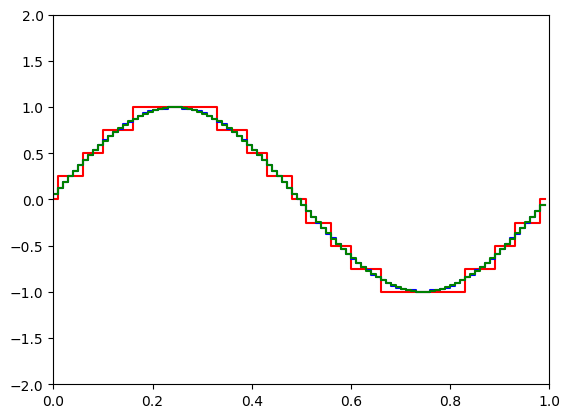

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def mifuncion( modo = "seno" , vmax = 1 , dc = 0 , ff = 1 , ph = 0 , nn = 1000 , fs = 1000 ):
    x = np.linspace(0 , (nn-1)/fs , nn) # Genero el array de tiempo
    if modo == "seno":
        y = dc + vmax * np.sin(2*np.pi*ff*x + ph) # Para generar la función senoidal utilizo la función provista por numpy
    elif modo == "cuadrada":
        y = dc + vmax * np.sign(np.sin(2*np.pi*ff*x + ph)) # Para generar una función cuadrada tomo el signo de la función seno
    elif modo == "diente":
        y = dc + 2 * vmax * (x * ff%1) - vmax # Para generar una función diente de sierra utilizo la fórmula de la recta que la representa. Al eje x lo escalo por la frecuencia para que se repita las veces que corresponda
    elif modo == "triangular":
        y = dc + 2 * vmax * (1 - np.abs((x * ff%1) - 0.5) * 2) - vmax ## Para generar una función triangular utilizo la fórmula que la representa. Al eje x lo escalo por la frecuencia para que se repita las veces que corresponda
    return x,y


vf = 2
b1 = 4
b2 = 8
b3 = 16

modo = "seno"
nn = 100
fs = nn
frec = fs / nn

t , sr = mifuncion( modo , ff =  frec , nn = nn , fs = fs )

q1 = vf / (2**(b1-1))
q2 = vf / (2**(b2-1))
q3 = vf / (2**(b3-1))
print(q1)
print(q2)
print(q3)

sq1 = np.zeros(len(sr))
sq2 = np.zeros(len(sr))
sq3 = np.zeros(len(sr))
e = np.zeros(len(sr))

for i in range(nn):
    sq1[i] = np.round(sr[i]/q1)*q1
    sq2[i] = np.round(sr[i]/q2)*q2
    sq3[i] = np.round(sr[i]/q3)*q3
    #e[i] = sq[i] - sr[i]


print(sq2)
print(sq3)
plt.step(t,sq1,color='red')
plt.step(t,sq2,color='blue')
plt.step(t,sq3,color='green')
plt.xlim(0,1)
plt.ylim(-vf,vf)
#plt.xlim(0,0.2)
#plt.ylim(0,0.5)
    
#print(sq)
#print(sr)
#print(q)
#print(e)
#media = sum(e)/len(e)
#print(media)

#varianza = np.var(e)
#print(varianza)

# Gráficos
#plt.plot(t,sr,color='red')
#plt.plot(t,sq)
#plt.step(t,sr)
#plt.xlim(0,1)
#plt.ylim(-vf,vf)
#plt.figure()
#plt.stem(t,e)
#plt.figure()
#plt.hist(e)

# Calcular la autocorrelación
#autocorrelacion = np.correlate(e, e, mode='full')
#autocorrelacion = autocorrelacion[autocorrelacion.size // 2:]  # Tomar solo la mitad positiva

# Normalizar
#autocorrelacion /= np.max(autocorrelacion)

# Graficar
#plt.figure()
#plt.stem(t,autocorrelacion)
#plt.title('Autocorrelación del Ruido Blanco')
#plt.xlabel('Lag')
#plt.xlim(0,0.2)
#plt.ylabel('Autocorrelación')
#plt.show()